# Aggregation of various sources of information, expert elicitation, or evidence

## Installation

Install the [pyuncertainnumber](https://github.com/leslieDLcy/PyUncertainNumber) library from [PyPI](https://pypi.org/project/pyuncertainnumber/).

```shell
pip install pyuncertainnumber
```

```{important}
A virtual enviroment is recommended for installation.

Follow the [instructions](https://pyuncertainnumber.readthedocs.io/en/latest/guides/installation.html) for additional details to install `pyuncertainnumber`.
```

In [1]:
from pyuncertainnumber import UN
import pyuncertainnumber as pun
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set up a global plotting style
plt.rcParams.update({
        "font.size": 11,
        "text.usetex": True,
        "font.family": "serif",
        "legend.fontsize": 'small',
        })

In [ ]:
from pyuncertainnumber import stochastic_mixture, envelope
from pyuncertainnumber.pba.dss import plot_DS_structure_with_labels

## expert elicitation is represented as probability distribution

In [12]:
a_d = pun.D('gaussian', (-5, 2))
b_d = pun.D('normal', (1.5, 3.))
c_d = pun.D('uniform', (1, 12))
d_d = pun.D('gaussian', (10, 1.5))
fixed_value=0
p_env = envelope(a_d, b_d, c_d, d_d)

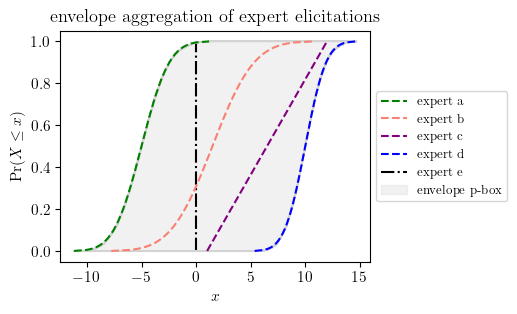

In [13]:
fig, ax = plt.subplots(figsize=(4, 3))
a_d.plot(ax=ax, label='expert a', color='green', ls='--', zorder=100)
b_d.plot(ax=ax, color='salmon', zorder=50, ls='--', label='expert b')
c_d.plot(ax=ax, label='expert c', color='purple', ls='--', zorder=100)
d_d.plot(ax=ax, label='expert d', color='blue', ls='--', zorder=100)
ax.vlines(fixed_value, ymin=0, ymax=1, color='black', linestyle='dashdot', label='expert e')
p_env.plot(ax=ax,  bound_colors=['lightgray', 'lightgray'], fill_color='lightgray', label='envelope p-box')
ax.set_title("envelope aggregation of expert elicitations")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

## expert opinion is represented as intervals


In [14]:
a = pun.I(1,5)
b = pun.I(3,6)
c = pun.I(2,3)
d = pun.I(2,9)

In [15]:
dss = stochastic_mixture(a,b,c,d)

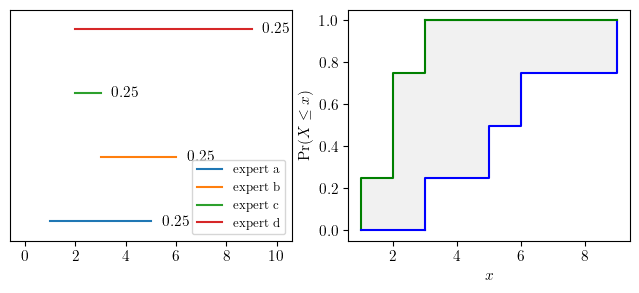

In [16]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 3))                          
ax0 = plot_DS_structure_with_labels([a,b,c,d], masses=[0.25, 0.25, 0.25, 0.25], offset=1.5, ax=ax0)
dss.plot(ax=ax1)
plt.show()